# Import libraries

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [5]:
from sklearn.linear_model import LinearRegression

import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [6]:
#read in data
df = pd.read_csv("/content/data.csv")

In [7]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,4600,70,2014-06-23 00:00:00,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,4600.0,NaN,NaN,NaN,551962.988473,563834.702547,0.0,322875.0,460943.461539,654962.5,26590000.0
bedrooms,4600.0,NaN,NaN,NaN,3.40087,0.908848,0.0,3.0,3.0,4.0,9.0
bathrooms,4600.0,NaN,NaN,NaN,2.160815,0.783781,0.0,1.75,2.25,2.5,8.0
sqft_living,4600.0,NaN,NaN,NaN,2139.346957,963.206916,370.0,1460.0,1980.0,2620.0,13540.0
sqft_lot,4600.0,NaN,NaN,NaN,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,NaN,NaN,NaN,1.512065,0.538288,1.0,1.0,1.5,2.0,3.5
waterfront,4600.0,NaN,NaN,NaN,0.007174,0.084404,0.0,0.0,0.0,0.0,1.0
view,4600.0,NaN,NaN,NaN,0.240652,0.778405,0.0,0.0,0.0,0.0,4.0
condition,4600.0,NaN,NaN,NaN,3.451739,0.67723,1.0,3.0,3.0,4.0,5.0


# Dealing with missing values

In [10]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [11]:
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [12]:
zero_price = df[df['price']==0]
zero_price.describe().T

,count,mean,std,min,25%,50%,75%,max
price,49.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
bedrooms,49.0,3.979592,1.108486,1.0,3.0,4.0,5.0,6.00
bathrooms,49.0,2.698980,1.194584,1.0,2.0,2.5,3.5,6.25
sqft_living,49.0,2787.142857,1354.375625,720.0,1910.0,2600.0,3500.0,8020.00
sqft_lot,49.0,16453.306122,27739.227932,3500.0,6863.0,9000.0,13783.0,188200.00
floors,49.0,1.500000,0.520416,1.0,1.0,1.5,2.0,3.00
waterfront,49.0,0.061224,0.242226,0.0,0.0,0.0,0.0,1.00
view,49.0,0.795918,1.485760,0.0,0.0,0.0,0.0,4.00
condition,49.0,3.673469,0.826331,2.0,3.0,3.0,4.0,5.00
sqft_above,49.0,2295.714286,1337.148708,720.0,1310.0,1990.0,3020.0,8020.00


<Axes: >

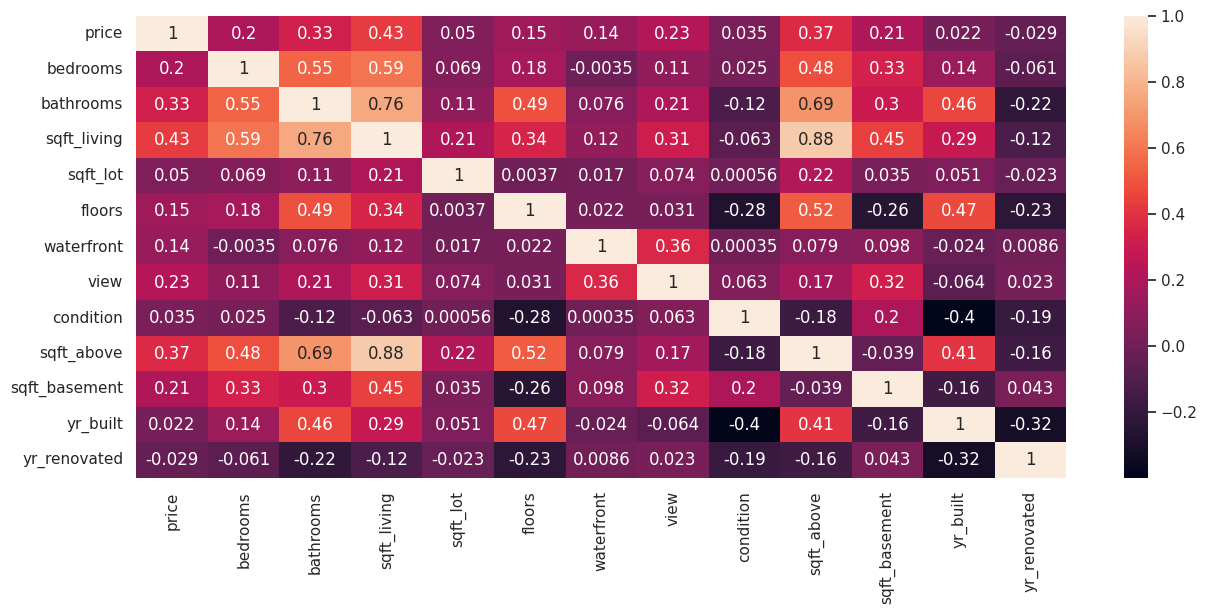

In [14]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15,6))
sns.heatmap(corr_matrix, annot = True)

In [17]:
low_price_data = df[(df['sqft_living'] < zero_price['sqft_living'].median()) &
         (df['bathrooms'] < zero_price['bathrooms'].median()) &
         (df['sqft_above'] < zero_price['sqft_above'].median()) ]
low_price = low_price_data.price.median()

high_price_data = df[(df['sqft_living'] > zero_price['sqft_living'].median()) &
         (df['bathrooms'] > zero_price['bathrooms'].median()) &
         (df['sqft_above'] > zero_price['sqft_above'].median()) ]
high_price = high_price_data.price.median()

data_prc = df.copy()
data_prc['price'] = np.where(((data_prc['price']==0) & (data_prc['sqft_living'] > zero_price['sqft_living'].median())), high_price, data_prc.price)
data_prc['price'] = np.where(((data_prc['price']==0) & (data_prc['sqft_living'] <= zero_price['sqft_living'].median())), low_price, data_prc.price)
data_prc.price[data_prc.price==0].count()


0

Text(0.5, 1.0, 'Bathrooms')

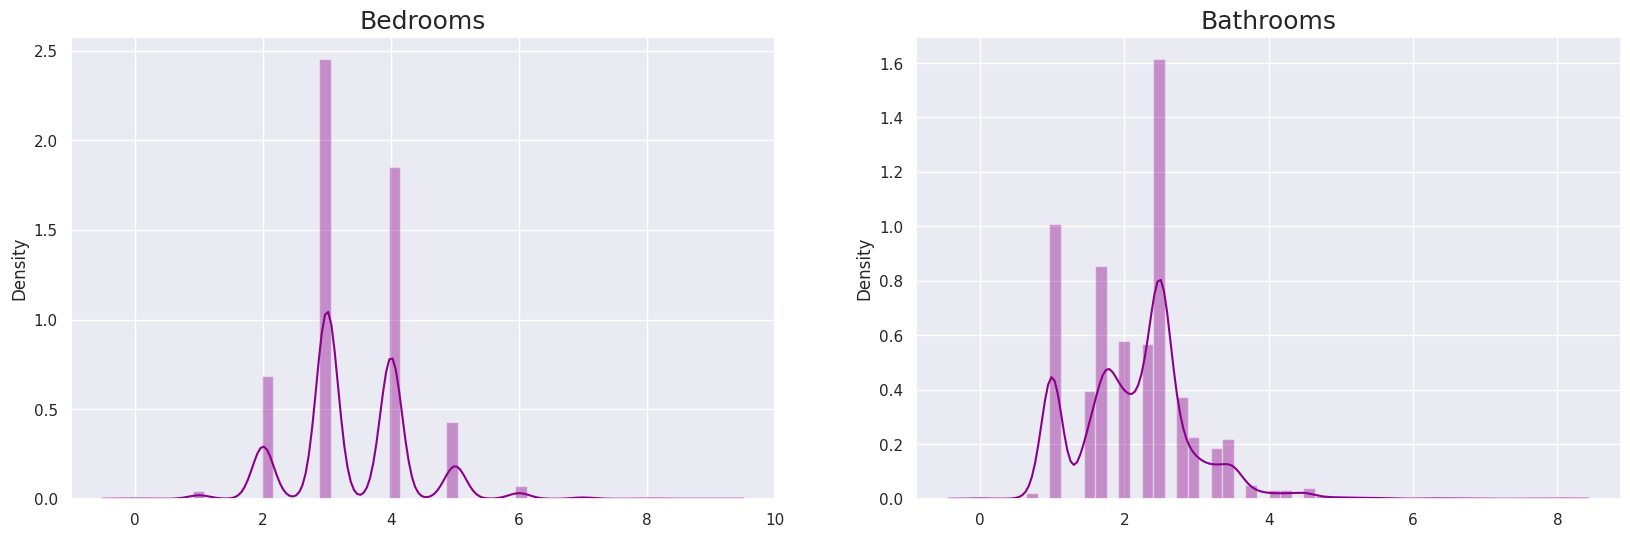

In [18]:
fig, ax = plt.subplots(1,2, figsize = (20,6))

sns.distplot(ax = ax[0], x= data_prc.bedrooms, color='darkmagenta')
ax[0].set_title('Bedrooms', size = 18)
sns.distplot(ax = ax[1], x = data_prc.bathrooms, color='darkmagenta')
ax[1].set_title('Bathrooms', size = 18)

In [19]:
data_prc.groupby('bedrooms')[['bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].mean()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,,,,,,,,,,,
0.0,0.000000,3937.000000,16386.000000,2.750000,0.000000,1.000000,3.000000,3937.000000,0.000000,1990.000000,2009.000000
1.0,1.072368,822.105263,9425.710526,1.144737,0.000000,0.000000,3.263158,771.578947,50.526316,1947.289474,994.684211
2.0,1.401943,1247.268551,12137.515901,1.303004,0.012367,0.197880,3.434629,1118.971731,128.296820,1954.842756,1014.929329
3.0,1.996924,1829.022638,13249.980315,1.472195,0.006890,0.187008,3.465551,1595.616634,233.406004,1971.444390,804.400098
4.0,2.472894,2608.437622,16609.540823,1.627694,0.003919,0.254082,3.416721,2237.169170,371.268452,1976.591117,739.542129
5.0,2.859065,3140.390935,18985.892351,1.576487,0.014164,0.439093,3.541076,2437.654391,702.736544,1972.586402,750.175637
6.0,2.979508,3321.606557,24394.918033,1.631148,0.016393,0.901639,3.655738,2488.327869,833.278689,1956.885246,847.737705
7.0,4.285714,4542.857143,35525.071429,1.714286,0.000000,0.785714,3.357143,3439.285714,1103.571429,1964.000000,1144.357143
8.0,3.125000,3615.000000,6587.500000,1.500000,0.000000,1.500000,4.000000,2305.000000,1310.000000,1968.000000,1002.000000


In [20]:
data_prc['bedrooms'] = data_prc['bedrooms'].replace(0, np.NaN)
data_prc['bedrooms'] = data_prc['bedrooms'].fillna(data_prc.bedrooms.median())

data_prc.bedrooms[data_prc.bedrooms==0].count()

0

In [21]:
data_prc['bathrooms'].replace(to_replace = 0, value = data_prc.bathrooms.median(), inplace= True)

data_prc.bathrooms[data_prc.bathrooms==0].count()

0

In [22]:
data_prc.groupby('bedrooms')[['bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].mean()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,,,,,,,,,,,
1.0,1.072368,822.105263,9425.710526,1.144737,0.000000,0.000000,3.263158,771.578947,50.526316,1947.289474,994.684211
2.0,1.401943,1247.268551,12137.515901,1.303004,0.012367,0.197880,3.434629,1118.971731,128.296820,1954.842756,1014.929329
3.0,1.997173,1831.095379,13253.063913,1.473451,0.006883,0.187807,3.465093,1597.918879,233.176500,1971.462635,805.584562
4.0,2.472894,2608.437622,16609.540823,1.627694,0.003919,0.254082,3.416721,2237.169170,371.268452,1976.591117,739.542129
5.0,2.859065,3140.390935,18985.892351,1.576487,0.014164,0.439093,3.541076,2437.654391,702.736544,1972.586402,750.175637
6.0,2.979508,3321.606557,24394.918033,1.631148,0.016393,0.901639,3.655738,2488.327869,833.278689,1956.885246,847.737705
7.0,4.285714,4542.857143,35525.071429,1.714286,0.000000,0.785714,3.357143,3439.285714,1103.571429,1964.000000,1144.357143
8.0,3.125000,3615.000000,6587.500000,1.500000,0.000000,1.500000,4.000000,2305.000000,1310.000000,1968.000000,1002.000000
9.0,4.500000,3830.000000,6988.000000,2.500000,0.000000,0.000000,3.000000,2450.000000,1380.000000,1938.000000,2003.000000


# Dealing with outliers

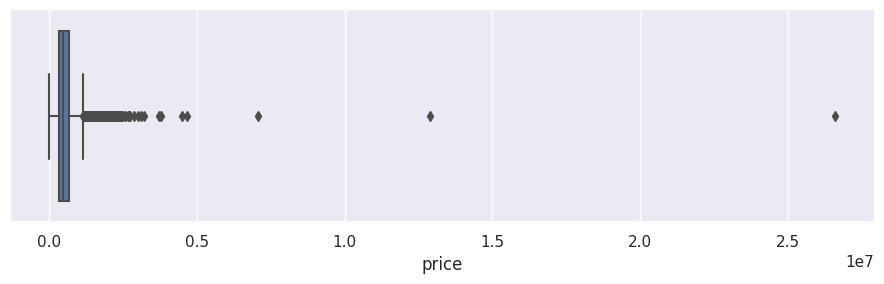

In [23]:
sns.catplot(x='price', data=data_prc, kind='box', height=3, aspect=3)

<Axes: xlabel='price', ylabel='Density'>

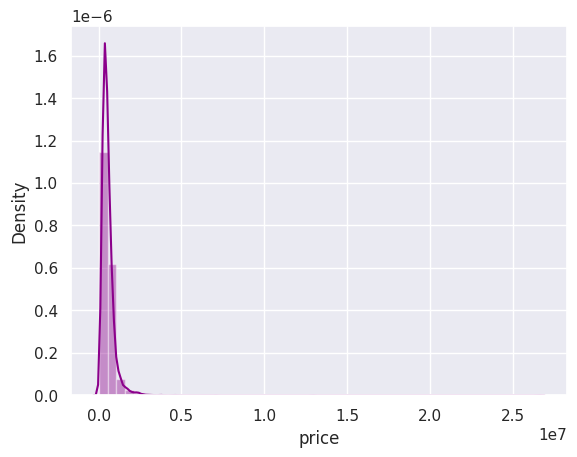

In [24]:
sns.distplot(data_prc.price, color='darkmagenta')

In [25]:
Q75 = np.percentile(data_prc['price'],75)
Q25 = np.percentile(data_prc['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

data1 = data_prc[(data_prc['price']<upper)]

25.070457468172982 , 0.7257728771054042


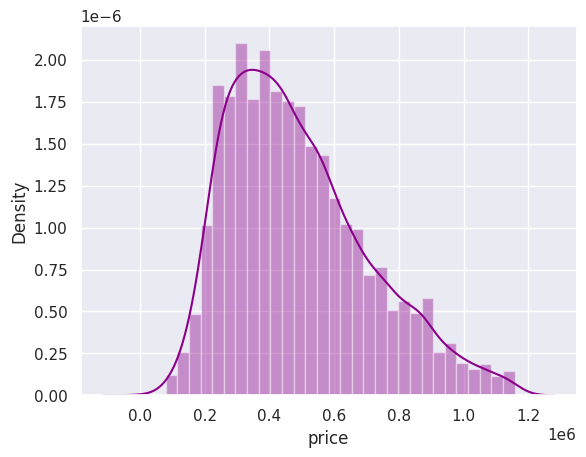

In [26]:
sns.distplot(data1.price, color='darkmagenta')

print(data_prc['price'].skew(),',', data1['price'].skew())

In [28]:
data1.columns.values

array(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'street', 'city', 'statezip', 'country'], dtype=object)

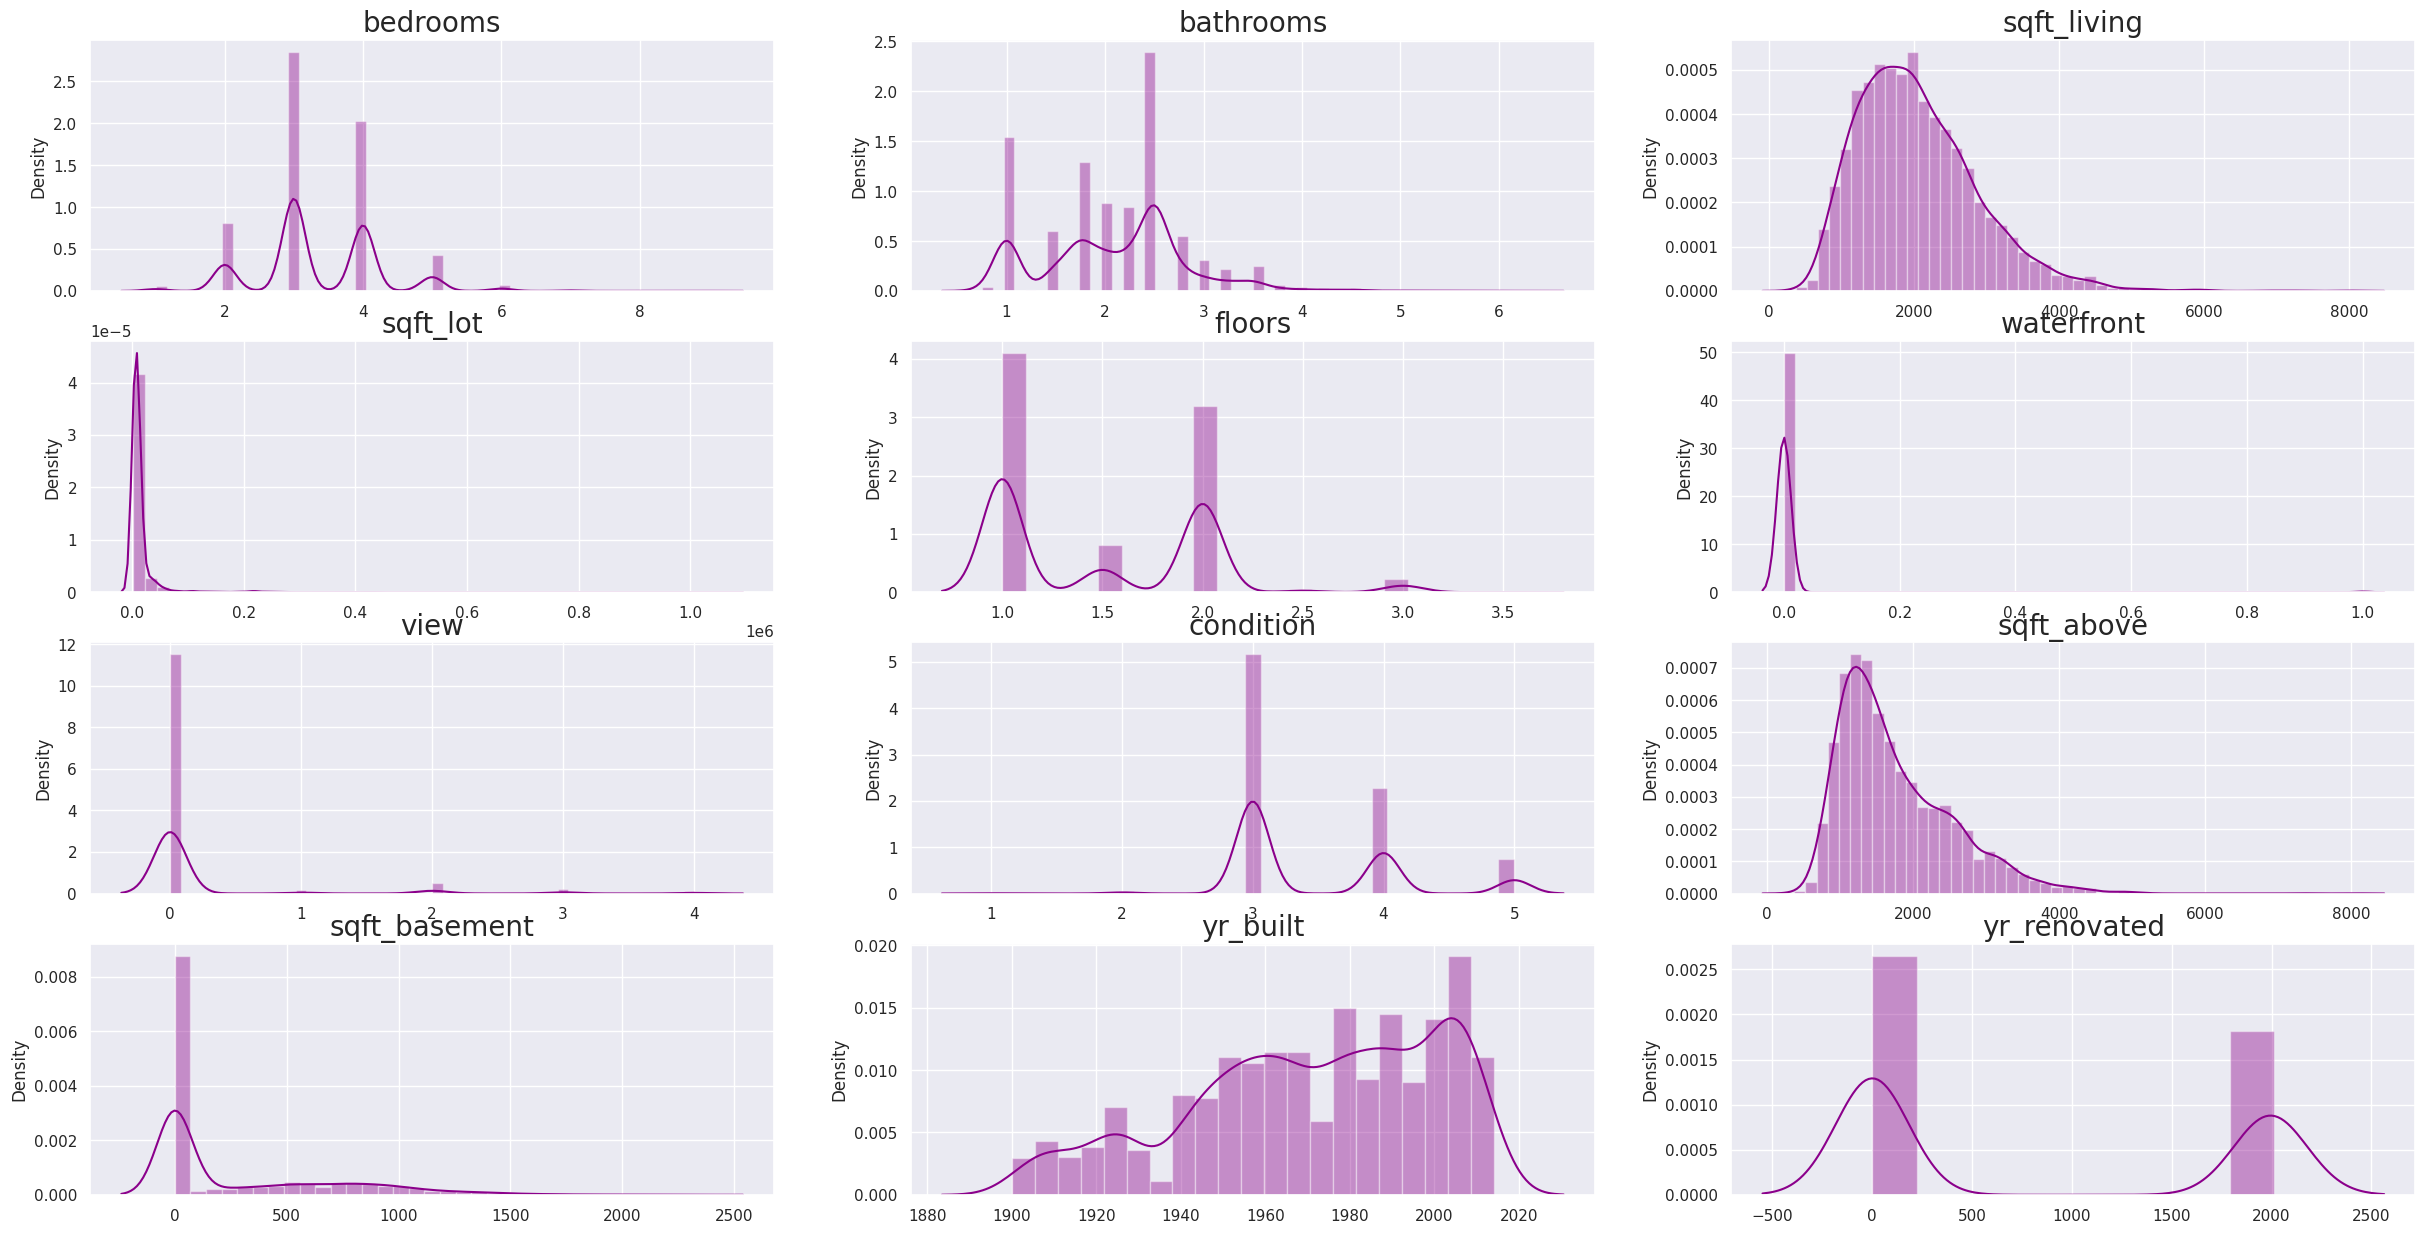

In [27]:
cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

fig, ax = plt.subplots(4,3, figsize = (30,15))

for idx, col in enumerate(cols):
    rn = math.floor(idx/3)
    cn = idx%3
    sns.distplot(ax=ax[rn,cn], x=data1[col], color='darkmagenta')
    ax[rn,cn].set_title(col, size=20)

1.0      38
2.0     562
3.0    1990
4.0    1414
5.0     297
6.0      49
7.0      10
8.0       1
9.0       1
Name: bedrooms, dtype: int64


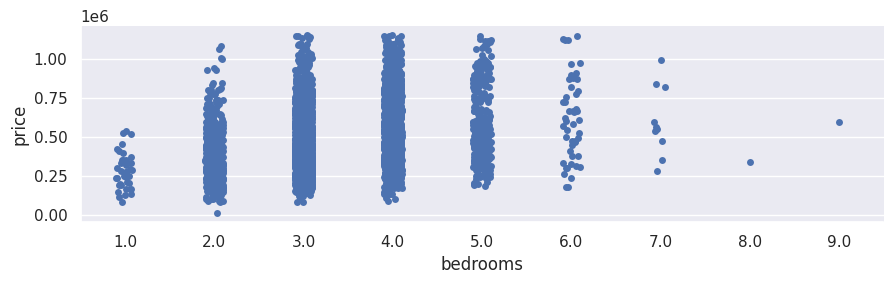

In [29]:
#bedrooms:
print(data1.bedrooms.value_counts().sort_index())
sns.catplot(x='bedrooms', y='price', data=data1, height=3, aspect=3)

In [30]:
data2 = data1[data1.bedrooms<7]

In [31]:
data2.bathrooms.value_counts().sort_index()

0.75      17
1.00     742
1.25       3
1.50     288
1.75     620
2.00     422
2.25     404
2.50    1148
2.75     261
3.00     147
3.25     103
3.50     120
3.75      28
4.00      15
4.25      11
4.50      12
4.75       2
5.00       4
5.25       1
5.50       1
6.25       1
Name: bathrooms, dtype: int64

0      17
1    1653
2    2235
3     398
4      40
5       6
6       1
Name: bathrooms, dtype: int64


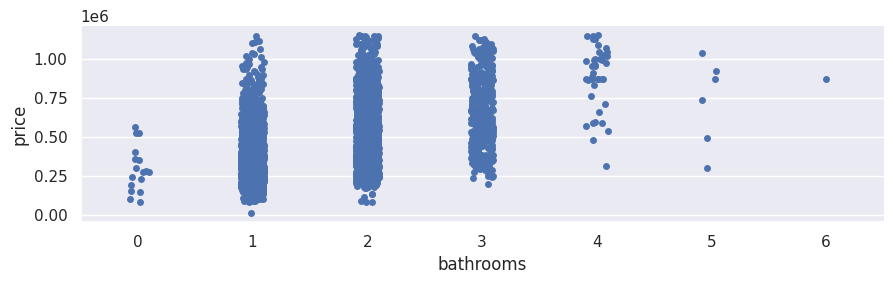

In [32]:
data2.bathrooms = data2.bathrooms.astype(int)
print(data2.bathrooms.value_counts().sort_index())

sns.catplot(x='bathrooms', y='price', data=data2, height=3, aspect=3)

In [34]:
data3 = data2[data2.bathrooms<4]

In [35]:
q = data3.sqft_living.quantile(0.99)
data4 = data3[data3.sqft_living<q]
print(data3.sqft_living.skew(),',', data4.sqft_living.skew())

0.7556982006741865 , 0.5233236461468229


(-100000.0, 1300000.0)

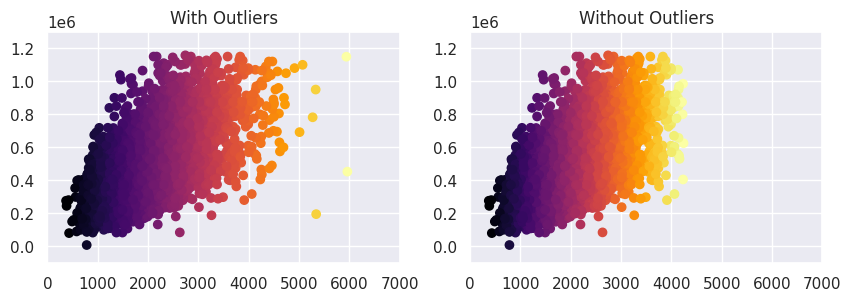

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(x= 'sqft_living', y= 'price', data = data3, c= 'sqft_living', cmap='inferno')
ax1.set_title('With Outliers')
ax1.set_xlim(0,7000)
ax1.set_ylim(-0.1e6,1.3e6)
ax2.scatter(x= 'sqft_living', y= 'price', data = data4, c= 'sqft_living', cmap='inferno')
ax2.set_title('Without Outliers')
ax2.set_xlim(0,7000)
ax2.set_ylim(-0.1e6,1.3e6)

In [37]:
q = data4.sqft_lot.quantile(0.99)
data5 = data4[data4.sqft_lot<q]

Text(0.5, 1.0, 'Without Outliers')

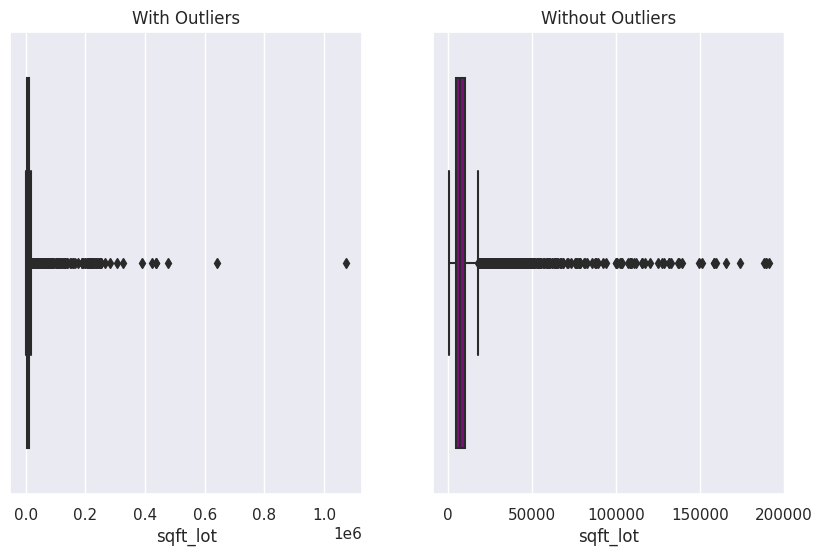

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

sns.boxplot(ax=ax[0], x=data4.sqft_lot, color = 'darkmagenta')
ax[0].set_title('With Outliers')
sns.boxplot(ax=ax[1], x=data5.sqft_lot, color = 'darkmagenta')
ax[1].set_title('Without Outliers')

In [39]:
data5.floors.value_counts()

1.0    2097
2.0    1566
1.5     409
3.0     119
2.5      23
3.5       2
Name: floors, dtype: int64

1    2506
2    1589
3     121
Name: floors, dtype: int64


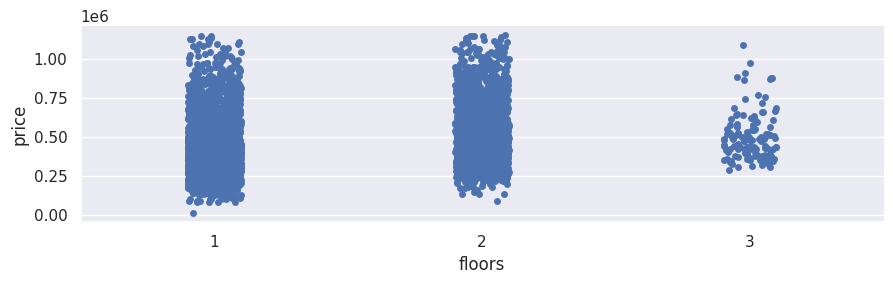

In [40]:
data6 = data5.copy()
data6.floors = data6.floors.astype(int)
print(data6.floors.value_counts())

sns.catplot(x='floors', y='price', data=data6, height=3, aspect=3)

In [43]:
data6.waterfront.value_counts()

0    4200
1      16
Name: waterfront, dtype: int64

In [44]:
print(data6.view.value_counts())

data7=data6.copy()
data7.view = data7.view.map({0:0, 1:1, 2:1, 3:1, 4:1})
print(data7.view.value_counts())

0    3911
2     154
3      64
1      54
4      33
Name: view, dtype: int64
0    3911
1     305
Name: view, dtype: int64


In [45]:
print(data7.condition.value_counts())

data7 = data7[data7['condition']>1]

3    2623
4    1171
5     386
2      30
1       6
Name: condition, dtype: int64


<Axes: >

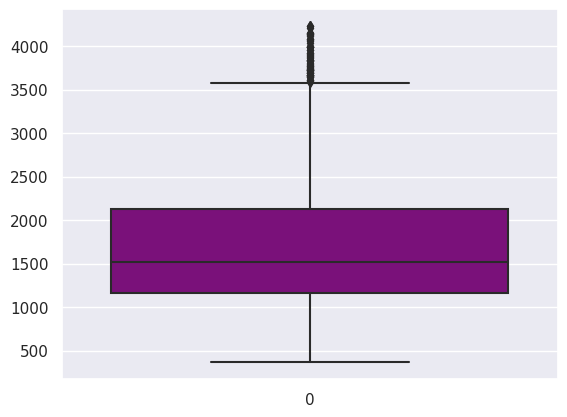

In [46]:
data8 = data7.copy()
sns.boxplot(data7.sqft_above, color= 'darkmagenta')

In [47]:
q = data8.sqft_basement.quantile(0.99)
data9 = data8[data8.sqft_basement<q]

(-100000.0, 1250000.0)

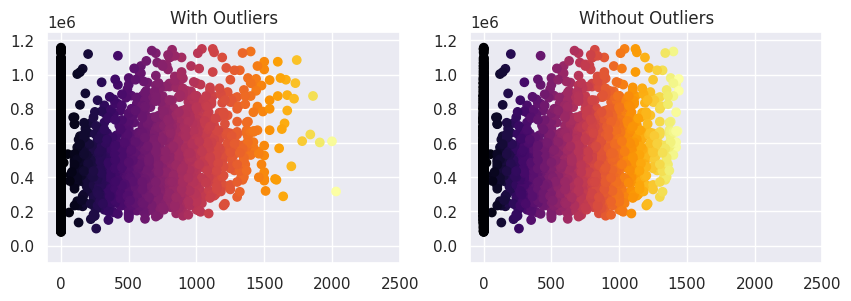

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(x= 'sqft_basement', y= 'price', data = data8, c= 'sqft_basement', cmap='inferno')
ax1.set_title('With Outliers')
ax1.set_xlim(-100,2500)
ax1.set_ylim(-0.1e6,1.25e6)
ax2.scatter(x= 'sqft_basement', y= 'price', data = data9, c= 'sqft_basement', cmap='inferno')
ax2.set_title('Without Outliers')
ax2.set_xlim(-100,2500)
ax2.set_ylim(-0.1e6,1.25e6)

<Axes: >

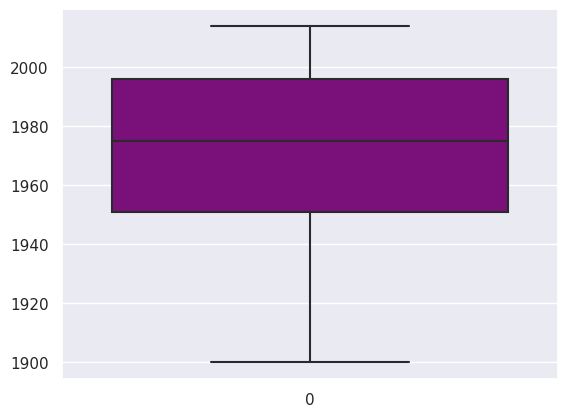

In [49]:
sns.boxplot(data9.yr_built, color= 'darkmagenta')

<Axes: xlabel='yr_renovated', ylabel='Density'>

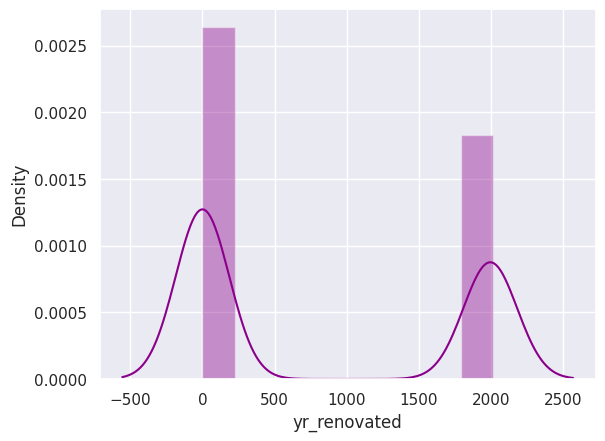

In [50]:
sns.distplot(data9.yr_renovated, color= 'darkmagenta')

In [51]:
data9.yr_renovated = pd.np.where(data9.yr_renovated==0,0,1)

In [52]:
data_pp = data9.drop(['date', 'city', 'street', 'statezip', 'country'], axis=1)
data_pp.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4167.0,478474.534624,208784.796665,80000.0,315684.35,440000.0,602250.0,1157400.0
bedrooms,4167.0,3.317495,0.844478,1.0,3.00,3.0,4.0,6.0
bathrooms,4167.0,1.681785,0.623212,0.0,1.00,2.0,2.0,3.0
sqft_living,4167.0,1965.253180,721.459840,370.0,1410.00,1890.0,2440.0,4240.0
sqft_lot,4167.0,11192.053516,16057.534463,638.0,5000.00,7476.0,10280.5,191228.0
floors,4167.0,1.439405,0.551794,1.0,1.00,1.0,2.0,3.0
waterfront,4167.0,0.003840,0.061854,0.0,0.00,0.0,0.0,1.0
view,4167.0,0.069354,0.254086,0.0,0.00,0.0,0.0,1.0
condition,4167.0,3.451884,0.665684,2.0,3.00,3.0,4.0,5.0
sqft_above,4167.0,1703.894648,710.554020,370.0,1160.00,1510.0,2137.0,4230.0


In [70]:
#Scaling

df_model = data_pp
df_model.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.167000e+03,4167.000000,4167.000000,4167.00000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000
mean,4.784745e+05,3.317495,1.681785,1965.25318,11192.053516,1.439405,0.003840,0.069354,3.451884,1703.894648,261.358531,1970.460283,0.409167
std,2.087848e+05,0.844478,0.623212,721.45984,16057.534463,0.551794,0.061854,0.254086,0.665684,710.554020,386.507351,29.621874,0.491739
min,8.000000e+04,1.000000,0.000000,370.00000,638.000000,1.000000,0.000000,0.000000,2.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.156843e+05,3.000000,1.000000,1410.00000,5000.000000,1.000000,0.000000,0.000000,3.000000,1160.000000,0.000000,1951.000000,0.000000
50%,4.400000e+05,3.000000,2.000000,1890.00000,7476.000000,1.000000,0.000000,0.000000,3.000000,1510.000000,0.000000,1975.000000,0.000000
75%,6.022500e+05,4.000000,2.000000,2440.00000,10280.500000,2.000000,0.000000,0.000000,4.000000,2137.000000,530.000000,1996.000000,1.000000
max,1.157400e+06,6.000000,3.000000,4240.00000,191228.000000,3.000000,1.000000,1.000000,5.000000,4230.000000,1440.000000,2014.000000,1.000000


In [71]:
X = df_model.iloc[:,1:].values

y = df_model.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [72]:
sc_X = StandardScaler()
X_train[:, 0:5] = sc_X.fit_transform(X_train[:, 0:5])
X_test[:, 0:5] = sc_X.transform(X_test[:, 0:5])
X_train[:, 6:11] = sc_X.fit_transform(X_train[:, 6:11])
X_test[:, 6:11] = sc_X.transform(X_test[:, 6:11])

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).flatten()

In [73]:
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = multi_lr.predict(X_test)
y_train_pred = multi_lr.predict(X_train)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_lr_train)
print("R2 Test Score:", r2_lr_test)
mse_lr_train = mean_squared_error(y_train, y_train_pred)
mse_lr_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_lr_train)
print("Mean Squared Error of Test:", mse_lr_test)

R2 Train Score: 0.46437543902052747
R2 Test Score: 0.4505990319343941
Mean Squared Error of Train: 0.5356245609794725
Mean Squared Error of Test: 24549186911.74259
